In [1]:
import pandas as pd
import joblib
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from catboost import CatBoostClassifier, Pool
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [20]:
 train.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [21]:
 test.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [5]:
dimensions = test.shape
print(f"Dimensions of the DataFrame: {dimensions}")
dimensions = train.shape
print(f"Dimensions of the DataFrame: {dimensions}")

Dimensions of the DataFrame: (51012, 37)
Dimensions of the DataFrame: (76518, 38)


In [6]:
train.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [15]:
train[['id','Target']].head(5)

,id,Target
0,0,Graduate
1,1,Dropout
2,2,Dropout
3,3,Enrolled
4,4,Graduate


In [3]:
O_E = OrdinalEncoder()
train[['id','Target']] = O_E.fit_transform(train[['id','Target']])
train[['id','Target']].head(5)

,id,Target
0,0.0,2.0
1,1.0,0.0
2,2.0,0.0
3,3.0,1.0
4,4.0,2.0


In [18]:
train.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921,1.143574
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382,0.885522
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000,1.000000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000,2.000000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000,2.000000


In [8]:
train.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [9]:
test.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [19]:
train.corr()['Target'].sort_values(ascending=False)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.781452
Curricular units 1st sem (approved)               0.725490
Curricular units 2nd sem (grade)                  0.719036
Curricular units 1st sem (grade)                  0.661355
Tuition fees up to date                           0.415691
Scholarship holder                                0.394124
Curricular units 2nd sem (enrolled)               0.289165
Curricular units 1st sem (enrolled)               0.263657
Curricular units 2nd sem (evaluations)            0.214951
Admission grade                                   0.172880
Course                                            0.154208
Curricular units 1st sem (evaluations)            0.152398
Displaced                                         0.150066
Previous qualification (grade)                    0.138119
Application order                                 0.128394
Daytime/evening attendance                        0.1244

In [11]:
target_column = 'Target'
split1 = train.iloc[:, :9].join(train[target_column])
split2 = train.iloc[:, 9:18].join(train[target_column])
split3 = train.iloc[:, 18:28].join(train[target_column])
split4 = train.iloc[:, 28:] 

In [12]:
corr_split1 = split1.corr()
corr_split2 = split2.corr()
corr_split3 = split3.corr()
corr_split4 = split4.corr()

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(corr_split1, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_matrix_1.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(corr_split2, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_matrix_2.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(corr_split3, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_matrix_3.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(corr_split4, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_matrix_4.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
train= train.drop(['id', 'Target'],axis=1)

In [ ]:

boxsplit1 = train.iloc[:, :9]
boxsplit2 = train.iloc[:, 9:18]
boxsplit3 = train.iloc[:, 18:28]
boxsplit4 = train.iloc[:, 28:] 

In [59]:

all_columns = train.columns.tolist()
features = all_columns
num_subset = features[:36]

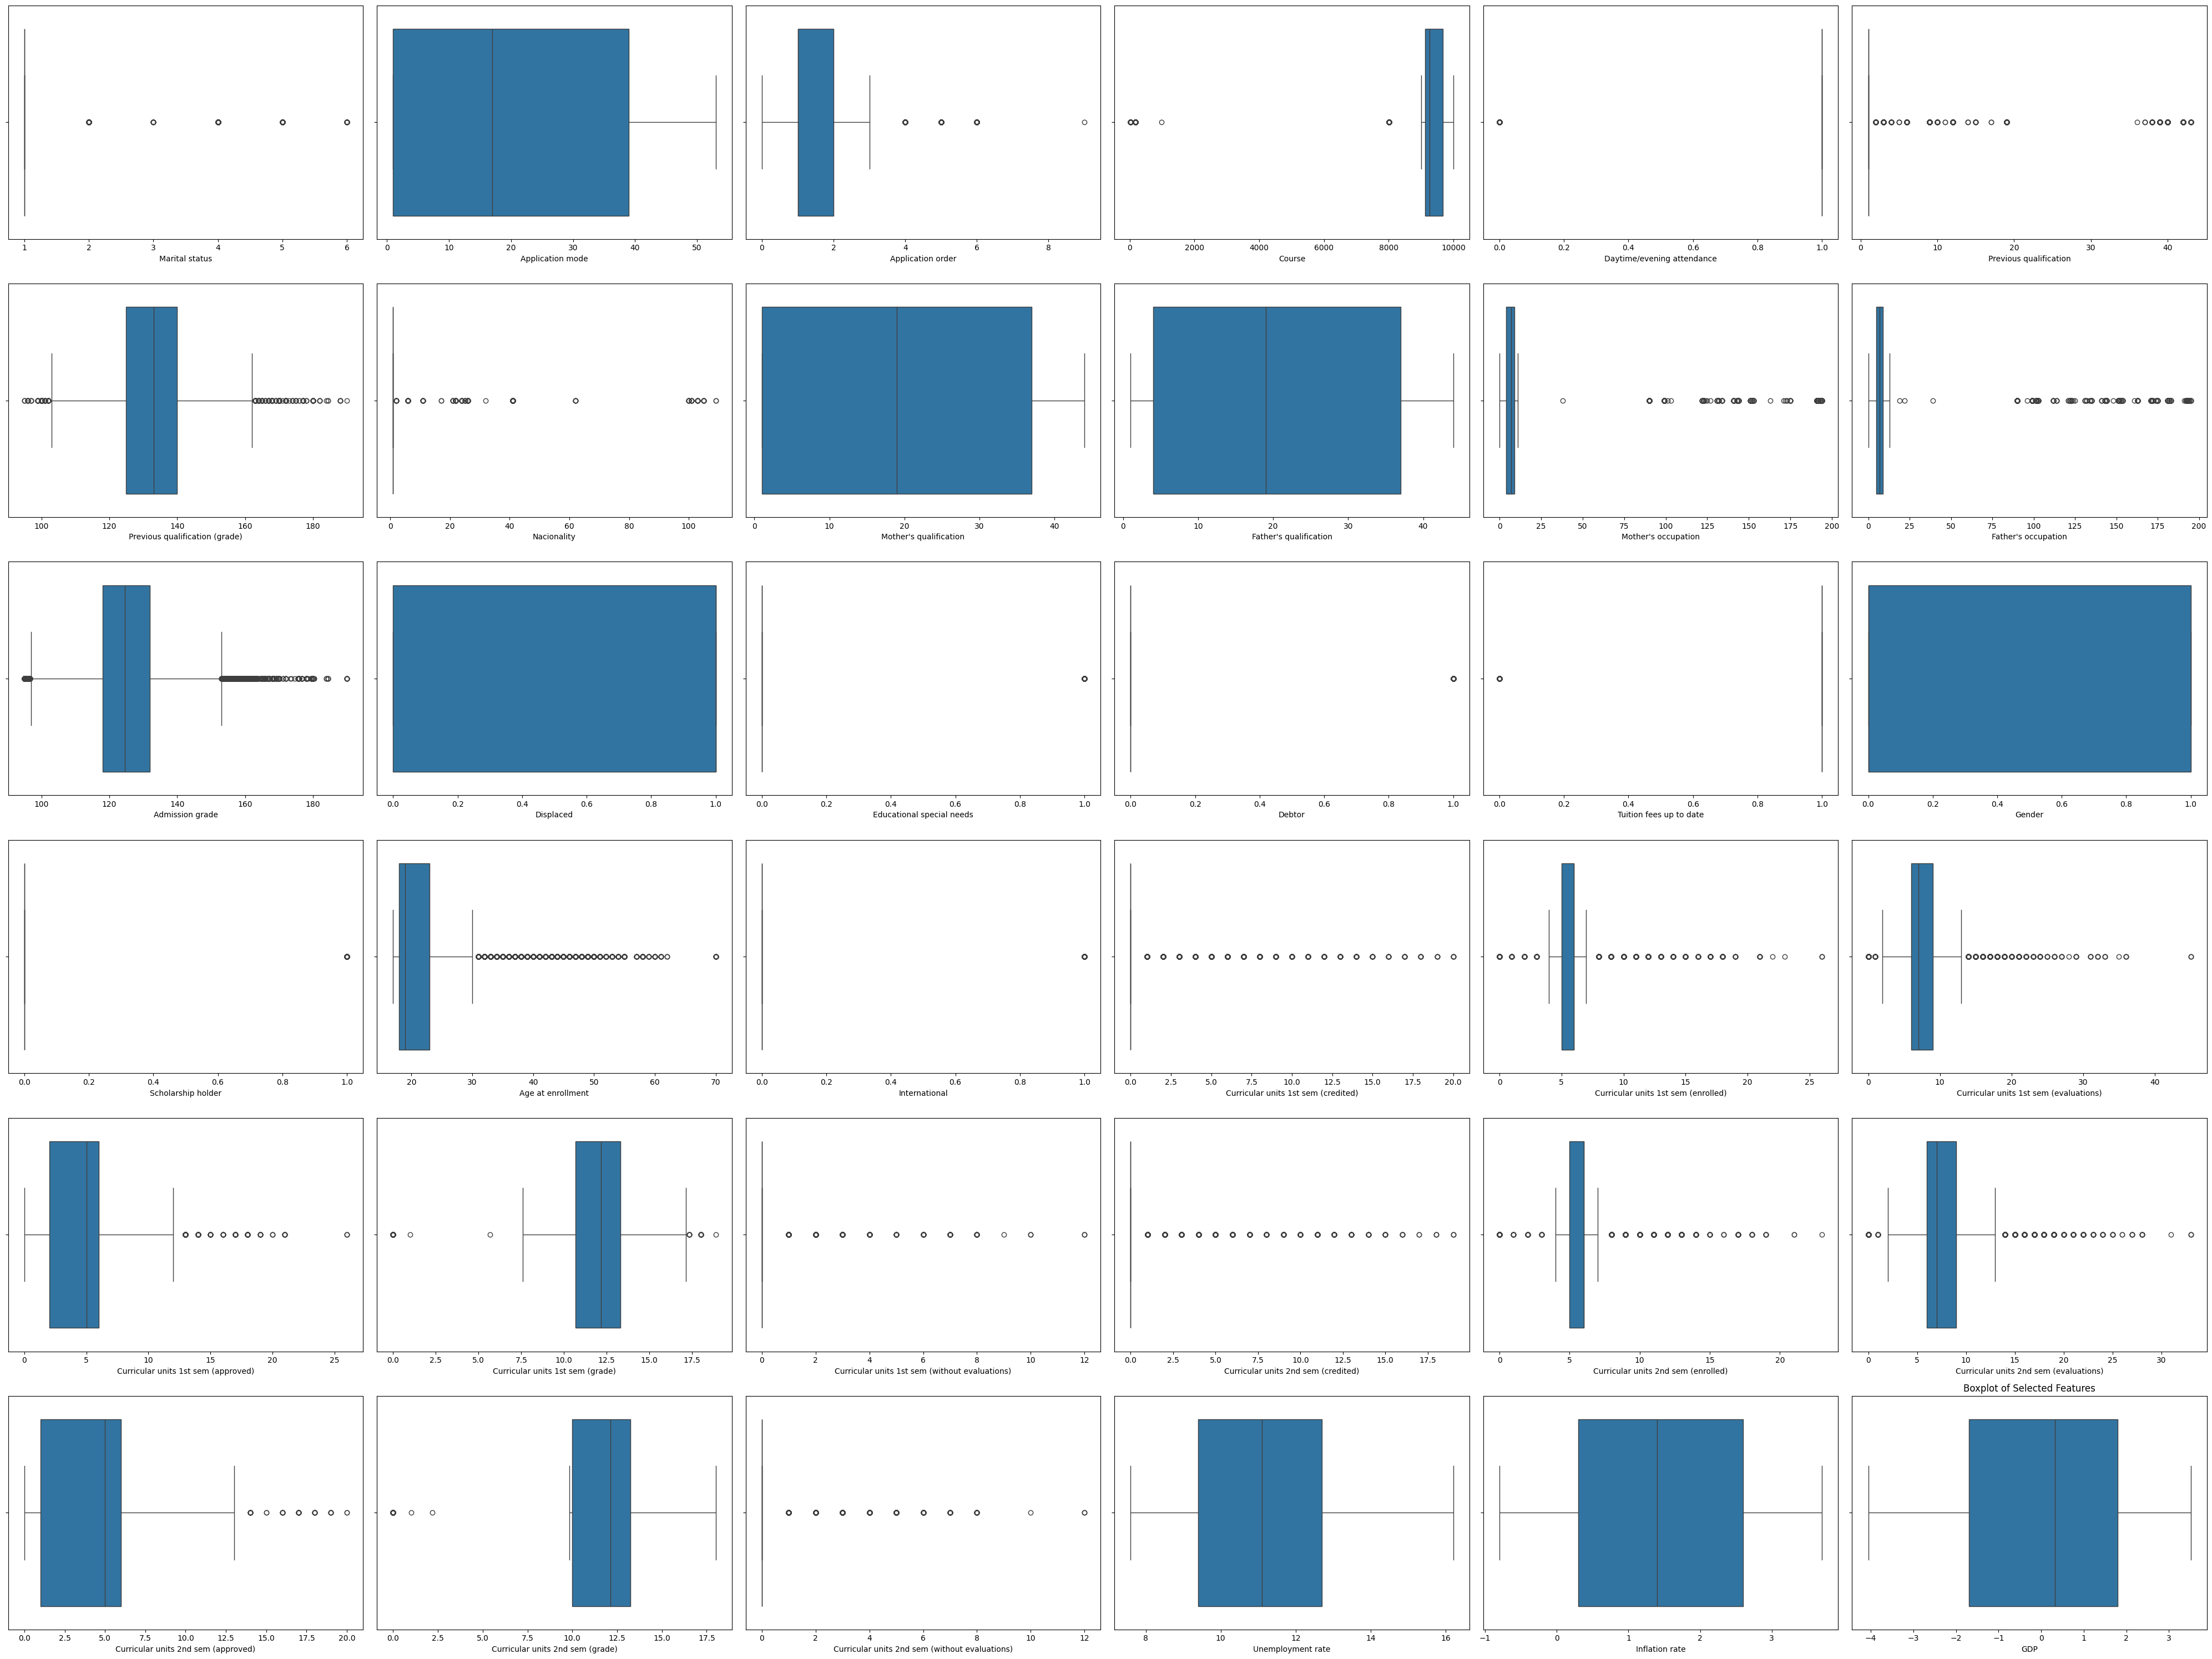

In [78]:
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(40,30))
axs = axs.flatten()
for i, var in enumerate(num_subset):
    sb.boxplot(x=var, data=train[features], ax=axs[i])
plt.title('Boxplot of Selected Features')
fig.tight_layout()
plt.savefig('boxpot1.png', dpi=300, bbox_inches='tight')
plt.show()

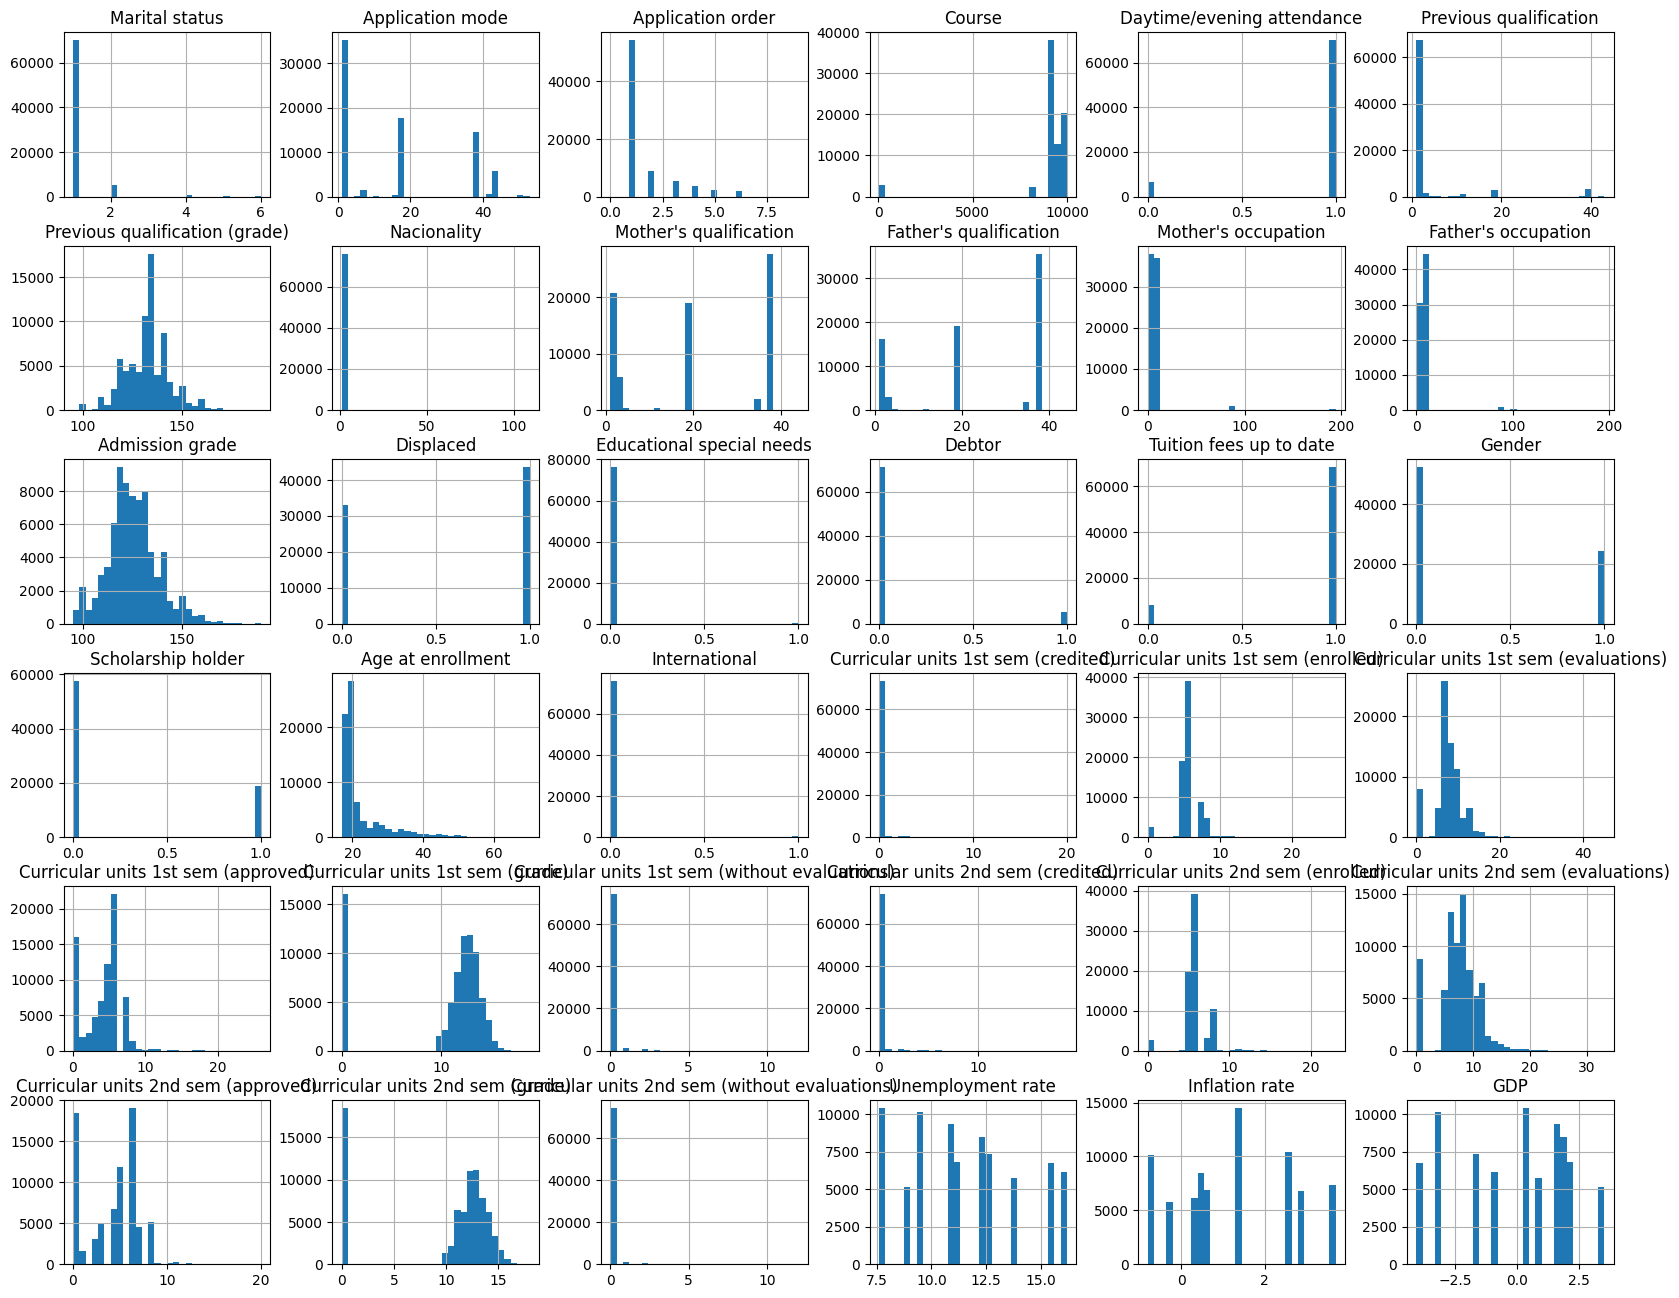

In [71]:
train.hist(figsize = (20, 16), bins=30)
plt.savefig('hist.png', dpi=300, bbox_inches='tight')

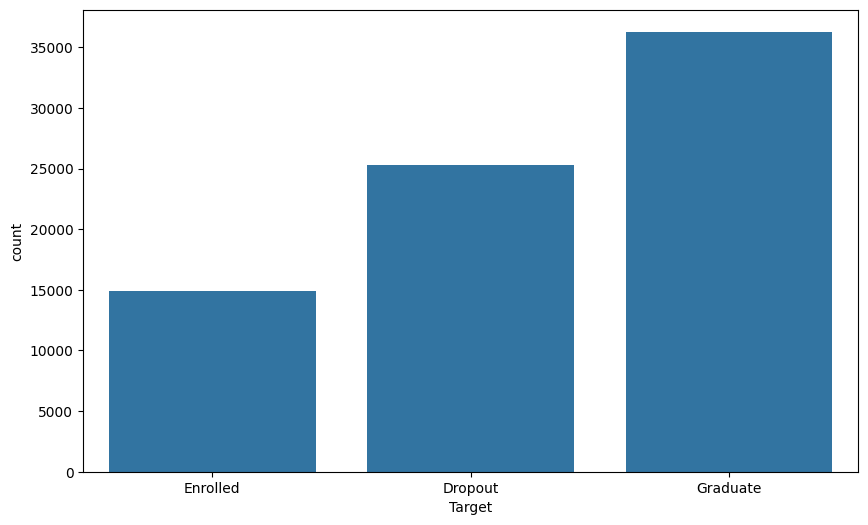

In [11]:
Target_count = train['Target'].value_counts().sort_values(ascending = True)
plt.figure(figsize = (10, 10))
sb.countplot(data = train, x = 'Target', order = Target_count.index)
plt.savefig('TargetHistogram.png', dpi=300, bbox_inches='tight')